In [1]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('stock-data.csv')

# Extract the 'open' column (assuming it is the 4th column)
open_value = dataset.iloc[:, 3]

# Remove rows where 'open_value' is missing
open_value = open_value.dropna()

# Convert into a column vector
open_value = open_value.values.reshape(-1, 1)

# Print the first 5 values and the shape
print(open_value[:5])
print(open_value.shape)

[[3.2912271 ]
 [3.30460596]
 [3.30460596]
 [3.30460596]
 [3.38488007]]
(11174, 1)


In [2]:
# Remove the first 4000 values
open_value = open_value[4000:]

# Print the first 5 values and the shape
print(open_value[:5])
print(open_value.shape)

[[41.25 ]
 [41.875]
 [42.125]
 [41.875]
 [42.375]]
(7174, 1)


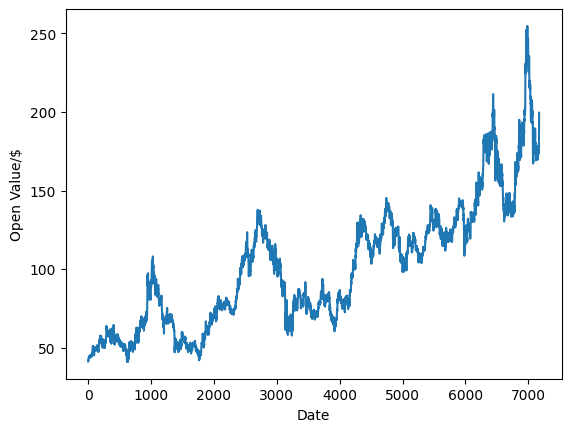

In [3]:
from matplotlib import pyplot as plt

plt.plot(open_value)
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler


scaler=MinMaxScaler(feature_range=(0,1))
scaled_open_value=scaler.fit_transform(open_value)

print(open_value[:5])
print(scaled_open_value[:5])

[[41.25 ]
 [41.875]
 [42.125]
 [41.875]
 [42.375]]
[[0.00146142]
 [0.00438427]
 [0.00555341]
 [0.00438427]
 [0.00672255]]


In [5]:
data = []
target = []

for i in range(100, open_value.shape[0] - 5):  # Subtract 5 to ensure we have enough data for target
    data.append(scaled_open_value[i - 100:i])  # 100 previous values
    target.append(scaled_open_value[i:i + 5])  # The next 5 values

In [6]:
import numpy as np

data_np=np.array(data)
target_np=np.array(target)

print(data_np.shape)
print(target_np.shape)

(7069, 100, 1)
(7069, 5, 1)


In [8]:
data=data_np
target=target_np

In [9]:
train_data=data[:6000]
train_target=target[:6000]

test_data=data[6000:]
test_target=target[6000:]

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(6000, 100, 1)
(1069, 100, 1)
(6000, 5, 1)
(1069, 5, 1)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Dense,Dropout,Activation,Flatten

model=Sequential()

model.add(Conv1D(filters=256,kernel_size=3,input_shape=(100,1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128,kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64,kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(5))

model.compile(loss='mse',optimizer='adam')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 98, 256)             │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 98, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 49, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 47, 128)             │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 47, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 23, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 21, 64)              │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 21, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 640)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │           3,205 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 127,301 (497.27 KB)

 Trainable params: 127,301 (497.27 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history=model.fit(train_data,train_target,epochs=100,validation_data=(test_data,test_target))

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0089 - val_loss: 0.0064
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0020 - val_loss: 0.0061
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0017 - val_loss: 0.0074
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0014 - val_loss: 0.0050
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0014 - val_loss: 0.0076
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0011 - val_loss: 0.0034
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0010 - val_loss: 0.0095
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 9.6027e-04 - val_loss: 0.0056
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 9.0136e-04 - val_loss: 0.0048
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 8.3706e-04 - val_loss: 0.0032
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 8.0074e-04 - val_loss: 0.0034
Epoch 12/1

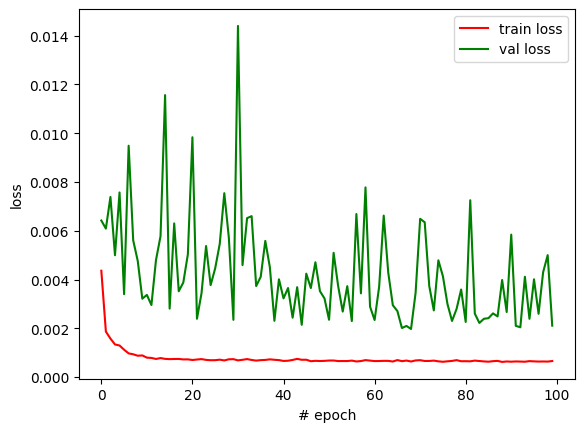

In [12]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Predict the values using the trained model
predictions = model.predict(test_data)

# Flatten the predictions and test_target to 1D arrays
predictions = predictions.reshape(-1)
test_target = test_target.reshape(-1)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_target, predictions))
print(f"RMSE: {rmse}")

# 2. Directional Accuracy
# Compute the direction of actual and predicted values
actual_direction = np.sign(np.diff(test_target))  # Direction of actual values
predicted_direction = np.sign(np.diff(predictions))  # Direction of predicted values

# Directional accuracy is the percentage of times the predicted direction matches the actual direction
directional_accuracy = np.mean(actual_direction == predicted_direction) * 100
print(f"Directional Accuracy: {directional_accuracy}%")

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
RMSE: 0.04592188651780118
Directional Accuracy: 49.02694610778443%
